In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.genfromtxt('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv',
                     delimiter=',', skip_header=1, encoding='utf-8')

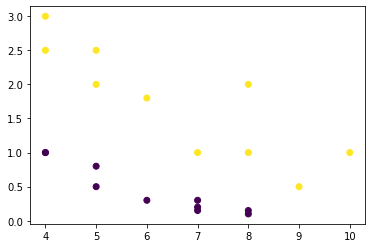

In [19]:
X = data[:,:2]
y = data[:, -1]
plt.scatter(X[:,0], X[:,1], c=y)

In [20]:
def calculate_gini(n1, n2):
    if n1+n2 == 0: 
        return 1
    else: 
        return 1 - (n1/(n1+n2))**2 - (n2/(n1+n2))**2
        
gini1 = calculate_gini(y.shape[0] - np.sum(y), np.sum(y))
gini1

0.5

In [21]:
G = {}
list_of_keys = []
for var in range(X.shape[1]):
    sorted = np.unique(np.sort(X[:, var]))
    for i in np.convolve(sorted, np.ones(2), 'valid') / 2:

        indx_below = np.where(X[:, var] <= i)
        y_below = y[indx_below]
        gini2 = calculate_gini(y_below.shape[0] - sum(y_below), sum(y_below))

        indx_above = np.where(X[:, var] > i)
        y_above = y[indx_above]
        gini3 = calculate_gini(y_above.shape[0] - sum(y_above), sum(y_above))

        gini_index = gini1 - gini2 * y_below.shape[0] / y.shape[0] - gini3 * y_above.shape[0] / y.shape[0]
      
        G[i] = gini_index
    gini_index_max = max(G.items(), key=lambda x: x[1])
    for key, value in G.items():
        if value == gini_index_max[1]:
            list_of_keys.append(key)
list_of_keys

[8.5, 0.9]

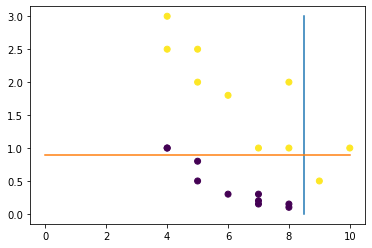

In [22]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot([list_of_keys[0], list_of_keys[0]],[0, max(X[:,1])])
plt.plot([0,  max(X[:,0])],[list_of_keys[1],list_of_keys[1]])

In [23]:
max(X[:,0])

10.0